## TC 5033
### Word Embeddings

<br>

#### Activity 3a: Exploring Word Embeddings with GloVe and Numpy
<br>

- Objective:
    - To understand the concept of word embeddings and their significance in Natural Language Processing.
    - To learn how to manipulate and visualize high-dimensional data using dimensionality reduction techniques like PCA and t-SNE.
    - To gain hands-on experience in implementing word similarity and analogies using GloVe embeddings and Numpy.
    
<br>

- Instructions:
    - Download GloVe pre-trained vectors from the provided link in Canvas, the official public project: 
    Jeffrey Pennington, Richard Socher, and Christopher D. Manning. 2014. GloVe: Global Vectors for Word Representation
    https://nlp.stanford.edu/data/glove.6B.zip

    - Create a dictorionay of the embeddings so that you carry out fast look ups. Save that dictionary e.g. as a serialized file for faster loading in future uses.
    
    - PCA and t-SNE Visualization: After loading the GloVe embeddings, use Numpy and Sklearn to perform PCA and t-SNE to reduce the dimensionality of the embeddings and visualize them in a 2D or 3D space.

    - Word Similarity: Implement a function that takes a word as input and returns the 'n' most similar words based on their embeddings. You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Word Analogies: Implement a function to solve analogies between words. For example, "man is to king as woman is to ____". You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Submission: This activity is to be submitted in teams of 3 or 4. Only one person should submit the final work, with the full names of all team members included in a markdown cell at the beginning of the notebook.
    
<br>

- Evaluation Criteria:

    - Code Quality (40%): Your code should be well-organized, clearly commented, and easy to follow. Use also markdown cells for clarity.
    
   - Functionality (60%): All functions should work as intended, without errors.
       - Visualization of PCA and t-SNE (10% each for a total of 20%)
       - Similarity function (20%)
       - Analogy function (20%)
|



# **Maestría en Inteligencia Artificial Aplicada**
## **Subject: Advance Machine Learning Methods**
### Tecnológico de Monterrey
### Jose Antonio Cantoral Ceballos

## Activity 3a: Exploring Word Embeddings with GloVe and Numpy

**Names and IDs of team members:**

|Nombre|Matrícula|
|:---|:---|
| Rodrigo López Aguilera | A01793071 |
| Diego Carrera Nicholls | A00464290 |
| Zmaltzin Paola Godinez Juarez | A01793548 |
| Ruben Guerrero del Fierro | A01793005 |

#### Import libraries

In [3]:
# Import libraries
import torch.nn.functional as F
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
import pickle
plt.style.use('ggplot')


#### Load file

In [4]:
# PATH = '/media/pepe/DataUbuntu/Databases/glove_embeddings/glove.6B.200d.txt'
# PATH = './glove/glove.6B.50d.txt'
emb_dim = 50
PATH = f'./glove/glove.6B.{emb_dim}d.txt'


This function loads the file and returns a dictionary with the words and their embeddings.

The format of the file is as follows:

```
word1 0.123 0.456 0.789 0.012 0.345 0.678
```

The first element is the word and the rest are the embeddings.

In [5]:
# Create dictionary with embeddings
def create_emb_dictionary(path):
    """
    Create dictionary with embeddings from glove file
    :param path: path to glove file
    """
    emb_dict = {}
    with open(path, 'r') as f:
        for line in f:
            values = line.split(' ')
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            emb_dict[word] = vector
    return emb_dict


Here we create the dictionary with the embeddings
and we print how many words are in the dictionary.

In [6]:
# create dictionary
embeddings_dict = create_emb_dictionary(PATH)
print('Dictionary created')
print('Number of words in dictionary: ', len(embeddings_dict))


Dictionary created
Number of words in dictionary:  400000


On the next cell we save the dictionary to a pickle file so we can load it faster in the future.

In [7]:
# Serialize
with open(f'./glove/embeddings_dict_{emb_dim}D.pkl', 'wb') as f:
    pickle.dump(embeddings_dict, f)

# Deserialize
# with open('embeddings_dict_200D.pkl', 'rb') as f:
#     embeddings_dict = pickle.load(f)


#### See some embeddings

Function that shows de top N words with their embeddings.

In [8]:
# Show some
def show_n_first_words(path, n_words):
    """
    Show first n words from glove file
    :param path: path to glove file
    :param n_words: number of words to show
    """
    with open(path, 'r') as f:
        for i, line in enumerate(f):
            print(line.split(), len(line.split()[1:]))
            if i>=n_words: break


In [9]:
show_n_first_words(PATH, 5)


['the', '0.418', '0.24968', '-0.41242', '0.1217', '0.34527', '-0.044457', '-0.49688', '-0.17862', '-0.00066023', '-0.6566', '0.27843', '-0.14767', '-0.55677', '0.14658', '-0.0095095', '0.011658', '0.10204', '-0.12792', '-0.8443', '-0.12181', '-0.016801', '-0.33279', '-0.1552', '-0.23131', '-0.19181', '-1.8823', '-0.76746', '0.099051', '-0.42125', '-0.19526', '4.0071', '-0.18594', '-0.52287', '-0.31681', '0.00059213', '0.0074449', '0.17778', '-0.15897', '0.012041', '-0.054223', '-0.29871', '-0.15749', '-0.34758', '-0.045637', '-0.44251', '0.18785', '0.0027849', '-0.18411', '-0.11514', '-0.78581'] 50
[',', '0.013441', '0.23682', '-0.16899', '0.40951', '0.63812', '0.47709', '-0.42852', '-0.55641', '-0.364', '-0.23938', '0.13001', '-0.063734', '-0.39575', '-0.48162', '0.23291', '0.090201', '-0.13324', '0.078639', '-0.41634', '-0.15428', '0.10068', '0.48891', '0.31226', '-0.1252', '-0.037512', '-1.5179', '0.12612', '-0.02442', '-0.042961', '-0.28351', '3.5416', '-0.11956', '-0.014533', '-0.

### Plot some embeddings

We created a function that plots the embeddings of the words in a 2D space, using either PCA or TSNE por dimensionality reduction.

The function applies the dimensionality reduction technique to the embeddings and then plots the words in a 2D space using a scatter plot.



In [10]:
plt.rcParams.update({'font.size': 8})
def plot_embeddings(emb_path, words2show, emb_dim, embeddings_dict, func = PCA):
    """
    Plot embeddings
    :param emb_path: path to glove file
    :param words2show: list of words to show
    :param emb_dim: dimension of embeddings
    :param embeddings_dict: dictionary with embeddings
    :param func: function to apply to embeddings
    """
    # Create embeddings matrix
    embeddings = np.zeros((len(words2show), emb_dim))
    for i, word in enumerate(words2show):
        embeddings[i] = embeddings_dict[word]
    # Apply PCA
    embeddings = func(n_components=2).fit_transform(embeddings)
    # Plot
    plt.figure(figsize=(10,10))
    plt.scatter(embeddings[:,0], embeddings[:,1], c='r')
    for i, word in enumerate(words2show):
        plt.annotate(word, xy=(embeddings[i,0], embeddings[i,1]), xytext=(5,2), textcoords='offset points', ha='center', va='bottom')
    plt.show()


In [11]:
words= ['burger', 'tortilla', 'bread', 'pizza', 'beef', 'steak', 'fries', 'chips',
            'argentina', 'mexico', 'spain', 'usa', 'france', 'italy', 'greece', 'china',
            'water', 'beer', 'tequila', 'wine', 'whisky', 'brandy', 'vodka', 'coffee', 'tea',
            'apple', 'banana', 'orange', 'lemon', 'grapefruit', 'grape', 'strawberry', 'raspberry',
            'school', 'work', 'university', 'highschool']


In this case we used PCA to reduce the dimensionality of the embeddings to 2D.

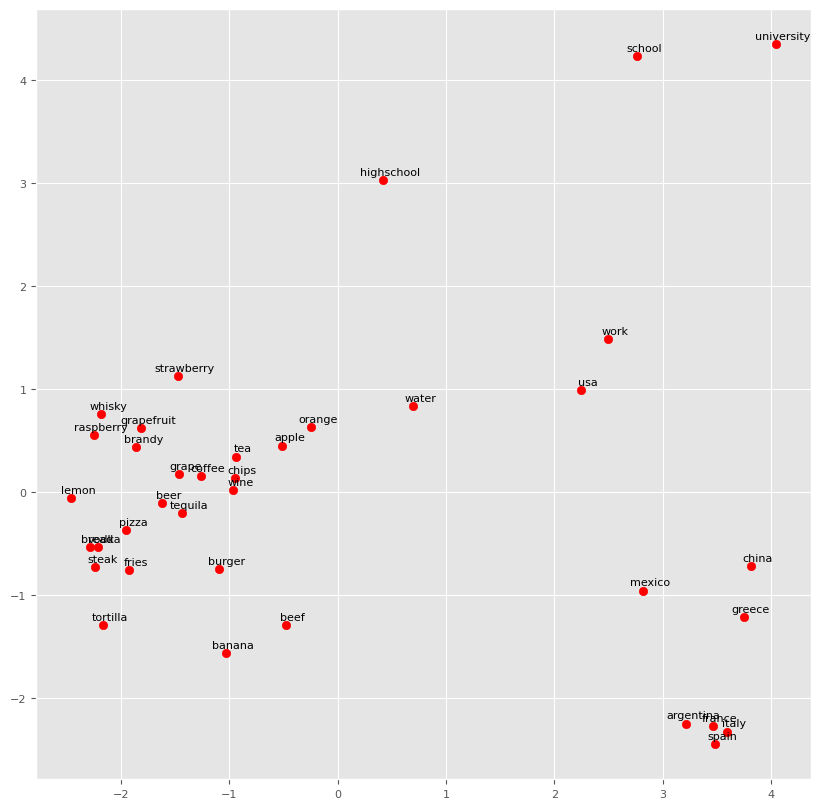

In [12]:
#
plot_embeddings(PATH, words, emb_dim, embeddings_dict, PCA)


Here we are plotting the embeddings with TSNE.

/Users/chango/Documents/Maestria/Advanced ML/venv/lib/python3.11/site-packages/threadpoolctl.py:1010: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


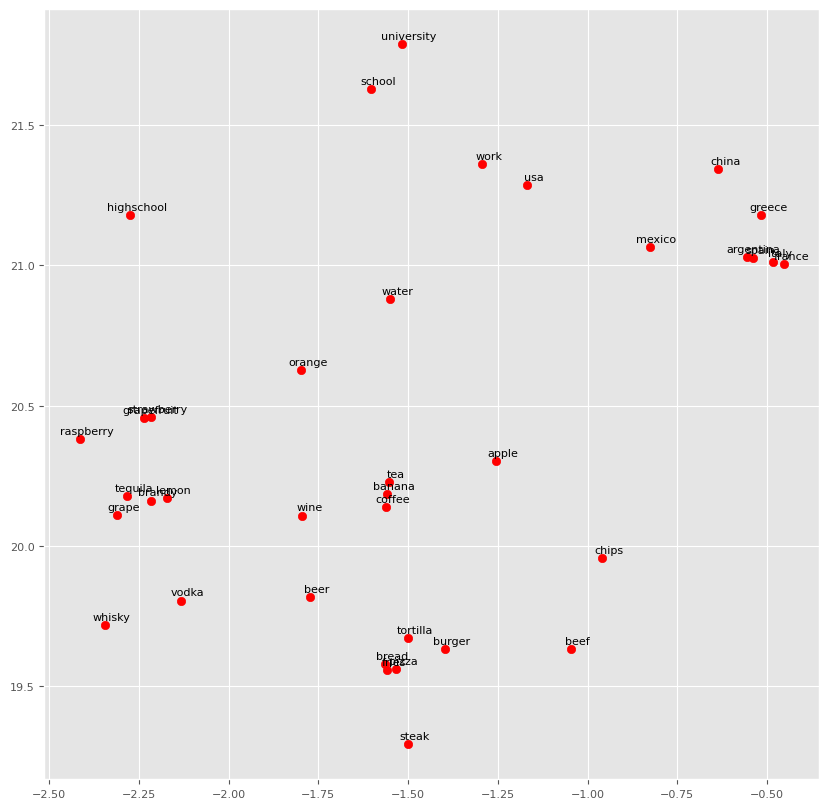

In [13]:
# t-SNE dimensionality reduction for visualization
embeddings = plot_embeddings(PATH, words, emb_dim, embeddings_dict, TSNE)


### Let us compute analogies

For computing analogies the principal idea is to find the vector that represents the relationship between the first pair of words, and then add that vector to the third word to find the fourth word, searching for the closest embedding to the result.

WORD2 - WORD1 + WORD3 = WORD4



In [14]:
# analogy
def analogy(word1, word2, word3, embeddings_dict):
    """
    Find the best word for the analogy: word1 is to word2 as word3 is to ?
    :param word1: first word
    :param word2: second word
    :param word3: third word
    :param embeddings_dict: dictionary with embeddings
    """
    word4 = embeddings_dict[word2] - embeddings_dict[word1] + embeddings_dict[word3]
    min_dist = 100
    best_word = ''
    for word in embeddings_dict:
        if word in [word1, word2, word3]:
            continue
        dist = norm(embeddings_dict[word] - word4)
        if dist < min_dist:
            min_dist = dist
            best_word = word
    return best_word




Here we test the analogy function with some examples:

In [21]:
print(analogy('man', 'king', 'woman', embeddings_dict))
print(analogy('mexico', 'mexican', 'spain', embeddings_dict))



queen
spanish


Next we define a function that computes the similarity between two words using the cosine similarity.

Which is defined as:
the dot product of the two vectors divided by the product of the magnitudes of the vectors.

After computing the similarity between the two words, we sort the words by their similarity and return the top N words.

In [16]:
# most similar
def find_most_similar(word, embeddings_dict, top_n=10):
    """
    Find the top_n most similar words to word
    :param word: word
    :param embeddings_dict: dictionary with embeddings
    :param top_n: number of most similar words to return
    """
    # find the top_n most similar words to word
    similarities = {}
    for w in embeddings_dict:
        # skip the word itself
        if w == word:
            continue
        # cosine similarity
        # dot product of the two vectors, divided by the product of their lengths (norms).
        similarities[w] = np.dot(embeddings_dict[w], embeddings_dict[word]) / (norm(embeddings_dict[w]) * norm(embeddings_dict[word]))
    return sorted(similarities.items(), key=lambda x: x[1], reverse=True)[:top_n]



Finally we test the similarity function with some examples

In [17]:
most_similar = find_most_similar('dog', embeddings_dict)


In [18]:
for i, w in enumerate(most_similar, 1):
    print(f'{i} ---> {w[0]}')


1 ---> cat
2 ---> dogs
3 ---> horse
4 ---> puppy
5 ---> pet
6 ---> rabbit
7 ---> pig
8 ---> snake
9 ---> baby
10 ---> bite


# Conclusions

In this activity we learned how to use word embeddings to represent words as vectors, and how to use them to compute analogies and similarities between words.

We also learned how to use dimensionality reduction techniques to help us visualize how embeddings are related to each other even though they are in a high dimensional space.